In [88]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [89]:
conn=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="root",
    database="eda"
)

In [90]:
query="select * from euromart_stores;"

df1=pd.read_sql(query,conn)
df1.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.50,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.00,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.00,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.50,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.50,17,-1,2,True


In [91]:
df1.info() #checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
 16  Feedback?      8047 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.

In [92]:
df1.columns #checking the columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [93]:
df1.shape #checking the shape of the data

(8047, 17)

In [94]:
df1.isnull().sum() #checking the null values

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [95]:
df1.duplicated().sum() #checking the duplicate values

np.int64(2)

In [96]:
df= df1.drop_duplicates() #dropping the duplicate values

In [97]:
df.duplicated().sum() #checking the duplicate values

np.int64(0)

In [98]:
df['Year']=pd.DatetimeIndex(df['Order Date']).year #extracting the year from the Order Date column
df['Month']=pd.DatetimeIndex(df['Order Date']).month #extracting the month from the Order Date column
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?',
       'Year', 'Month'],
      dtype='object')

In [99]:
df['Discount']=df['Discount']*100 #converting the discount column to percentage
df['Discount']=df['Discount'].astype('int') #converting the discount column to integer

In [100]:
df['Total_Sales']=df['Sales']*df['Quantity'] #creating a new column Total_Sales
df['Total_Profit']=df['Profit']*df['Quantity'] #creating a new column Total_Profit

In [101]:
df.head(1) #checking the first row of the data

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Total_Sales,Total_Profit
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Enermax Note Cards, Premium",50,45,-26,3,False,2011,1,135,-78


In [102]:
df['Year'].unique() #checking the unique values in the Year column 

array([2011, 2012, 2013, 2014], dtype=int32)

In [103]:
df['Month'].unique() #checking the unique values in the Month column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [104]:
def qurter(month): #creating a function to get the quarter of the month
    if month in [1,2,3]:
        return "Quarter 1"
    elif month in [4,5,6]:
        return "Quarter 2"
    elif month in [7,8,9]:
        return "Quarter 3"
    else:
        return "Quarter 4"
    
df['Quarters']=df['Month'].apply(qurter) #applying the function to the Month column

In [105]:
df['Quarters'].unique() #checking the unique values in the Quarters column 

array(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], dtype=object)

In [106]:
df['Month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Api',5:'May',6:'Jun',7:'JUL',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True) 
#replacing the month number with month name

In [107]:
df.rename(columns={'Discount':'Discount %'},inplace=True) #renaming the column Discount to Discount %

In [108]:
df.columns #checking the columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount %', 'Sales', 'Profit', 'Quantity',
       'Feedback?', 'Year', 'Month', 'Total_Sales', 'Total_Profit',
       'Quarters'],
      dtype='object')

In [109]:
df.drop(columns=['Order ID', 'Order Date'],axis=1,inplace=True) #dropping the columns Order ID and Order Date

In [110]:
df.head(1) #checking the first row of the data

,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount %,Sales,Profit,Quantity,Feedback?,Year,Month,Total_Sales,Total_Profit,Quarters
0,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50,45,-26,3,False,2011,Jan,135,-78,Quarter 1


In [111]:
df.shape #checking the shape of the data

(8045, 20)

In [112]:
df.describe().T  #checking the statistics of the data

,count,mean,std,min,25%,50%,75%,max
Discount %,"8,045.00",11.01,18.18,0.00,0.00,0.00,10.00,85.00
Sales,"8,045.00",291.90,485.26,3.00,48.00,117.00,313.00,"6,517.00"
Profit,"8,045.00",35.20,178.15,"-3,060.00",1.00,14.00,47.00,"2,476.00"
Quantity,"8,045.00",3.77,2.20,1.00,2.00,3.00,5.00,14.00
Year,"8,045.00","2,012.73",1.10,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
Total_Sales,"8,045.00","1,479.01","3,726.22",3.00,128.00,414.00,"1,274.00","80,206.00"
Total_Profit,"8,045.00",171.52,"1,325.59","-36,720.00",1.00,40.00,182.00,"29,712.00"


In [113]:
df.describe(include='object').T #checking the statistics of the data

,count,unique,top,freq
Customer Name,8045,792,Joel Peters,32
Country,8045,15,France,1916
State,8045,127,England,1187
City,8045,999,London,219
Region,8045,3,Central,4425
Segment,8045,3,Consumer,4173
Ship Mode,8045,4,Economy,4860
Category,8045,3,Office Supplies,5284
Sub-Category,8045,17,Art,1151
Product Name,8045,1810,"Eldon File Cart, Single Width",26


In [114]:
cat=df.select_dtypes(exclude=['int','float']).columns #checking the categorical columns
num=df.select_dtypes(include=['int','float']).columns.tolist() #checking the numerical columns
print(cat)
print(num)

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Feedback?',
       'Month', 'Quarters'],
      dtype='object')
['Discount %', 'Sales', 'Profit', 'Quantity', 'Year', 'Total_Sales', 'Total_Profit']


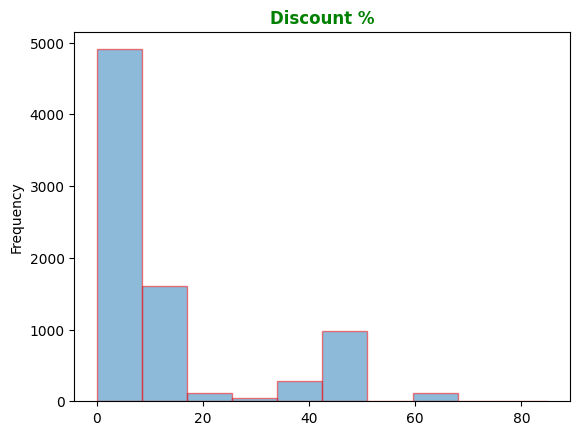

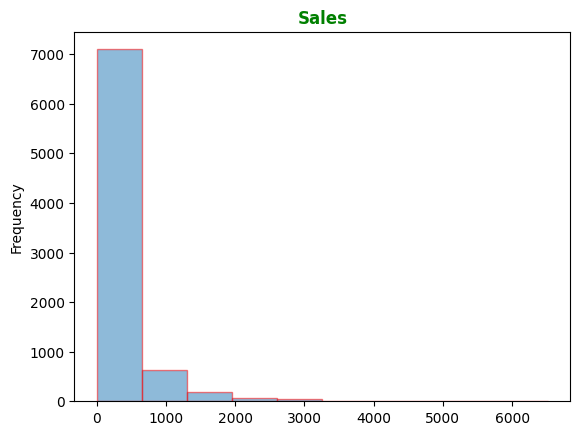

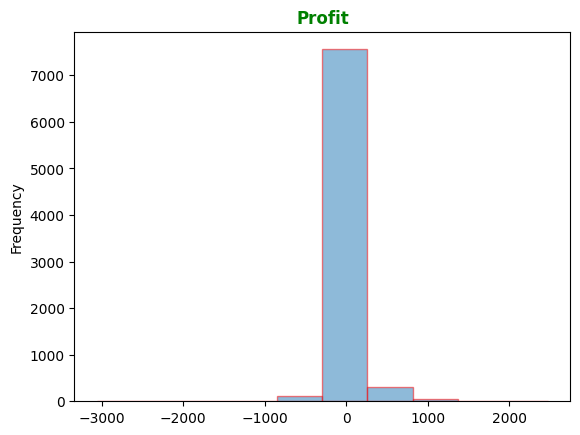

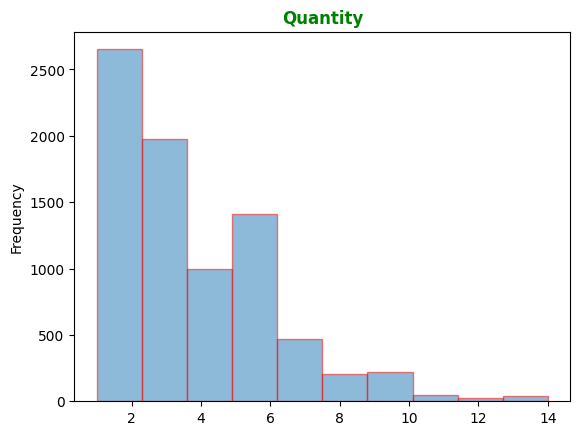

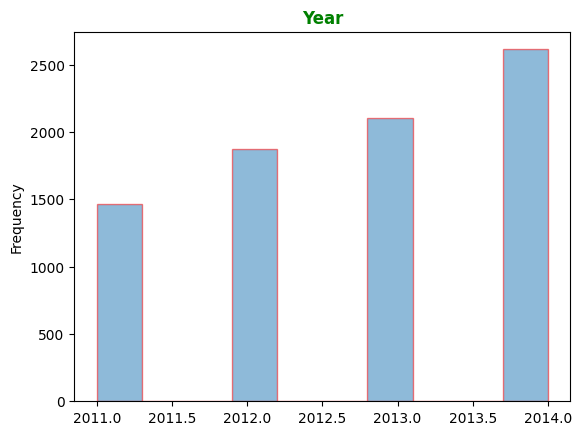

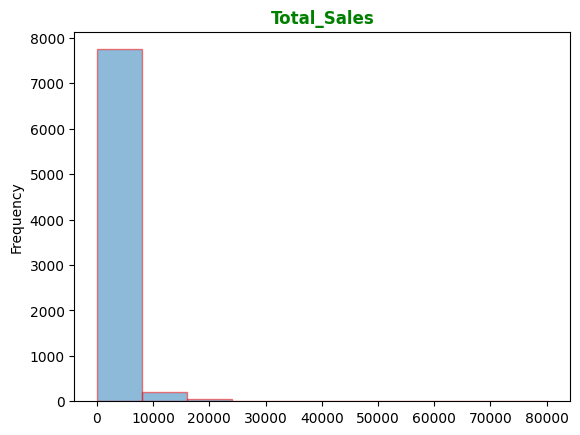

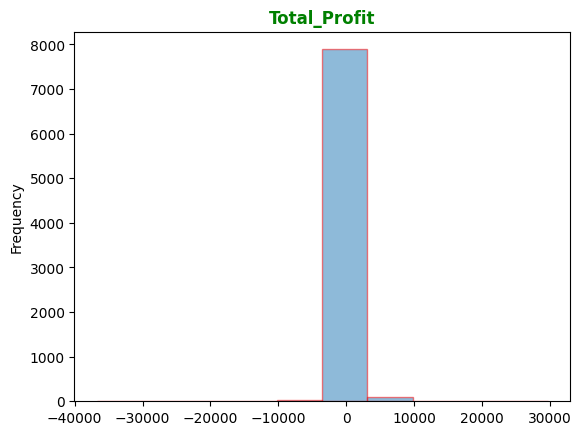

In [115]:
for col in num: #plotting the histogram for numerical columns
    plt.figure()
    plt.hist(df[col],bins=10,alpha=0.5,edgecolor='red')
    plt.ylabel('Frequency')
    plt.title(col,fontsize=12,fontweight='bold',color='green')
    plt.show()

In [116]:
cat=['Customer Name','Country','State','City','Region','Segment','Ship Mode','Category','Sub-Category','Product Name','Feedback?','Month','Quarters'] 
#categorical columns


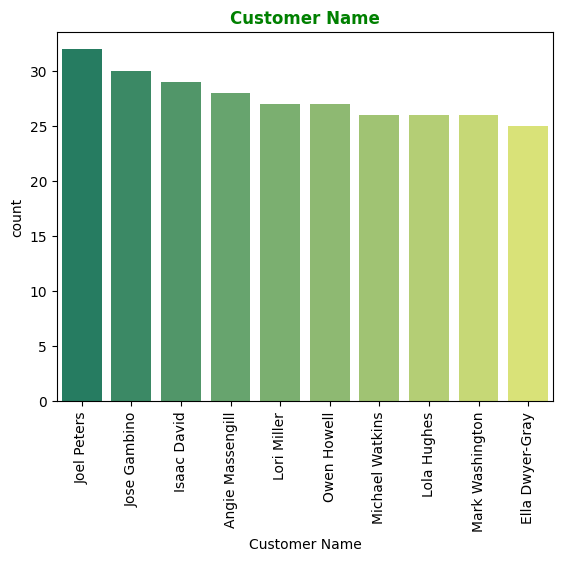

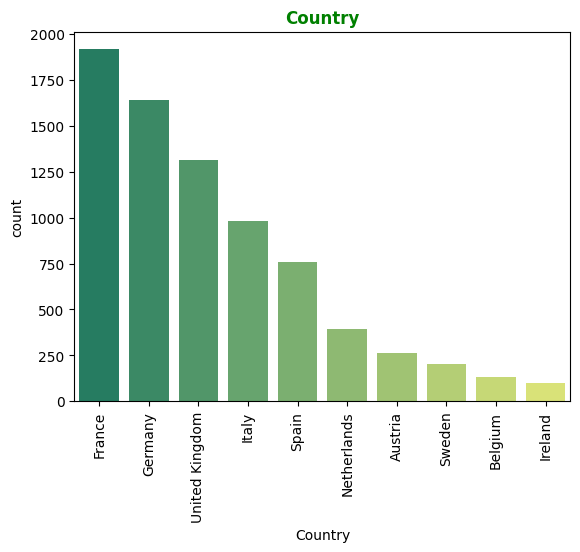

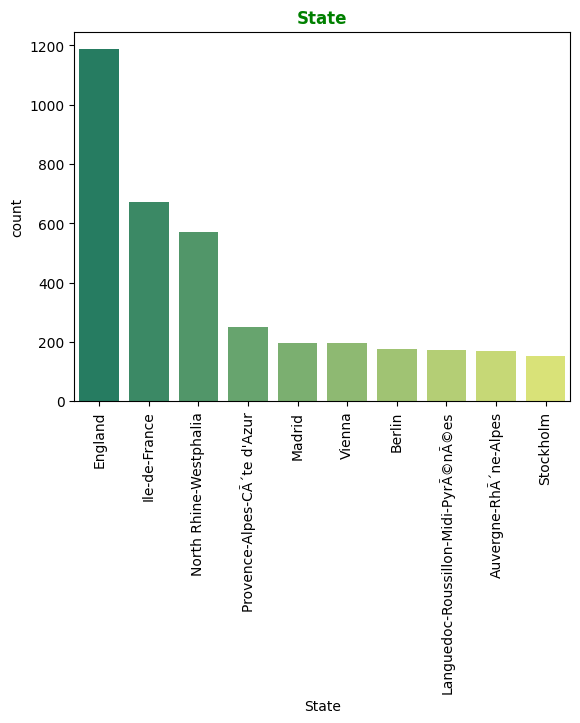

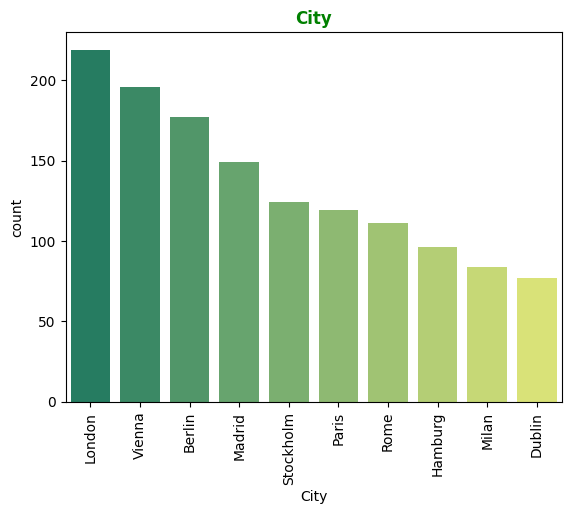

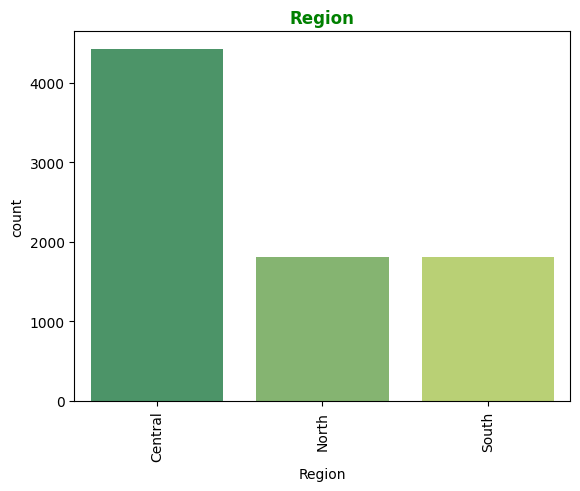

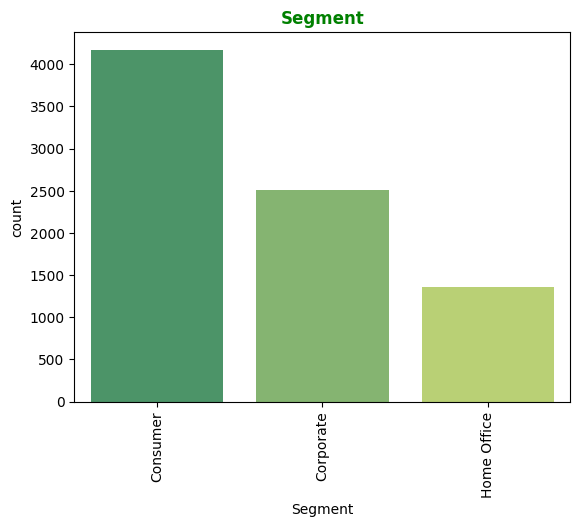

In [ ]:
for col in cat: #plotting the countplot for categorical columns
    plt.Figure()
    sns.countplot(x=col,data=df,order=df[col].value_counts().head(10).index,palette='summer')
    plt.xticks(rotation=90)
    plt.title(col,fontsize=12,fontweight='bold',color='green')
    plt.show()
    

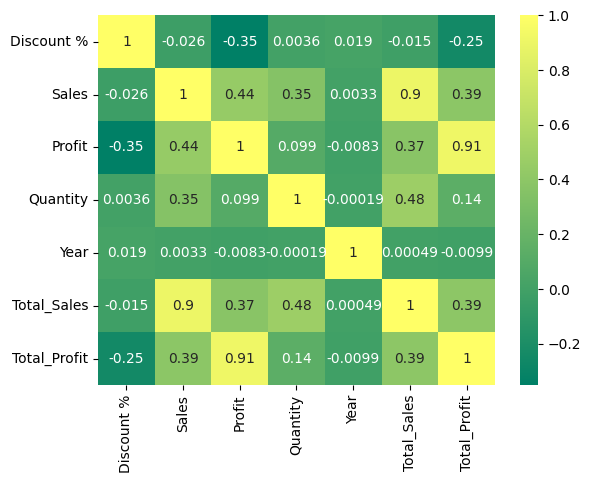

In [ ]:
cor=df[num].corr('pearson') #checking the correlation between the numerical columns
sns.heatmap(cor,annot=True,cmap='summer')
plt.show()

In [33]:
pd.options.display.float_format='{:,.2f}'.format #setting the float format

In [34]:
print(f'Net Sales {df['Sales'].sum()}') #calculating the Net Sales

Net Sales 2348361


In [35]:
print(f'Net Profit {df['Profit'].sum()}')   #calculating the Net Profit

Net Profit 283202


In [36]:
print(f'Gross Profit {df['Total_Profit'].sum()}') #calculating the Gross Profit

Gross Profit 1379880


In [37]:
print(f'Gross Sales {df['Total_Sales'].sum()}') #calculating the Gross Sales

Gross Sales 11898620


In [38]:
print(f'Profit Margin {round(df['Total_Profit'].sum()/df['Total_Sales'].sum()*100)}') #calculating the Profit Margin

Profit Margin 12


In [39]:
year_analysis=df.groupby('Year').agg({ #grouping the data by Year and aggregating the columns
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum',
}).reset_index().sort_values(by='Sales',ascending=False)

In [40]:
import seaborn as sns
sns.color_palette('coolwarm') #setting the color palette

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

In [ ]:
year_analysis.style.background_gradient(cmap='Blues') #styling the data

,Year,Sales,Profit,Quantity
3,2014,755030,85330,9833
2,2013,630140,77172,7935
1,2012,548843,66213,7096
0,2011,414348,54487,5484


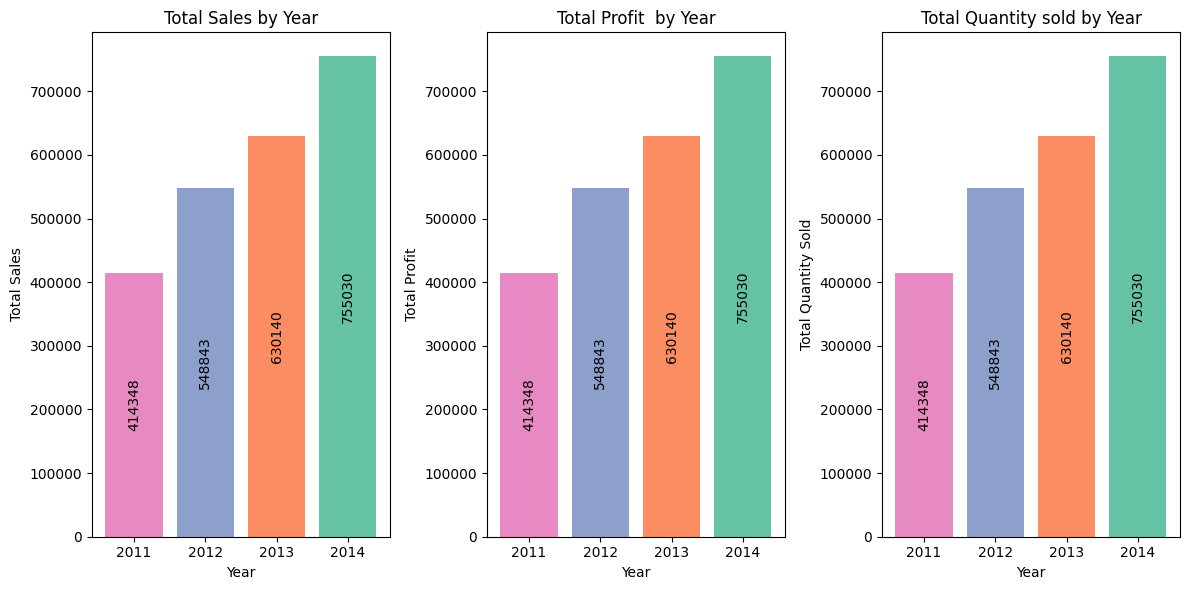

In [86]:
plt.figure(figsize=(12,6)) #plotting the barplot for the year_analysis


plt.subplot(1,3,1)
bar_values=plt.bar(year_analysis['Year'],year_analysis['Sales'],color=sns.color_palette('Set2'))
plt.bar_label(bar_values,fmt='%.f',rotation=90,label_type='center',color='black')
plt.xticks([2011,2012,2013,2014])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')


plt.subplot(1,3,2)
bar_values=plt.bar(year_analysis['Year'],year_analysis['Sales'],color=sns.color_palette('Set2'))
plt.bar_label(bar_values,fmt='%.f',rotation=90,label_type='center',color='black')
plt.xticks([2011,2012,2013,2014])
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit  by Year')


plt.subplot(1,3,3)
bar_values=plt.bar(year_analysis['Year'],year_analysis['Sales'],color=sns.color_palette('Set2'))
plt.bar_label(bar_values,fmt='%.f',rotation=90,label_type='center',color='black')
plt.xticks([2011,2012,2013,2014])
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity sold by Year')

plt.tight_layout() #adjusting the layout
plt.show()

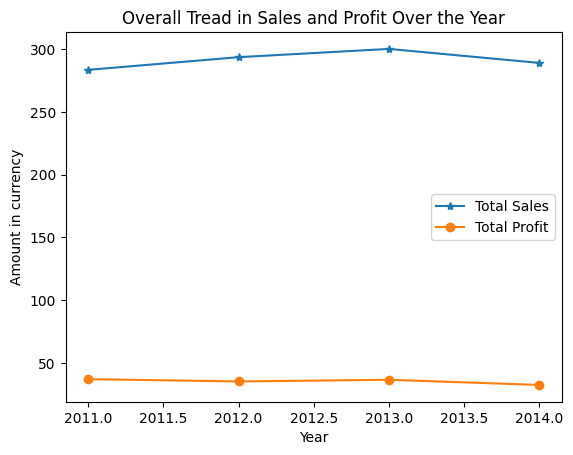

In [87]:
yearly_data=df.groupby('Year').agg({'Sales':'mean','Profit':'mean'}).reset_index() #grouping the data by Year and aggregating the columns

plt.Figure(figsize=(10,6))
plt.plot(yearly_data['Year'],yearly_data['Sales'],label='Total Sales',marker='*')
plt.plot(yearly_data['Year'],yearly_data['Profit'],label='Total Profit',marker='o')
plt.xlabel('Year')
plt.ylabel('Amount in currency')
plt.title('Overall Tread in Sales and Profit Over the Year')
plt.legend() #adding the legend
plt.show()


In [44]:
monthly_data=df.groupby('Month').agg({ #grouping the data by Month and aggregating the columns
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum',
}).sort_values(by='Sales',ascending=False).reset_index()

In [45]:
monthly_data.style.background_gradient(cmap='Greens') #styling the data

,Month,Sales,Profit,Quantity
0,Aug,303089,38476,4207
1,Sep,295289,37423,3695
2,Nov,277239,28533,3687
3,Dec,272751,34103,3556
4,Jun,271744,31769,3291
5,JUL,146159,16694,1695
6,May,142461,16171,1778
7,Jan,139157,17507,1753
8,Api,132051,16004,1686
9,Feb,123685,14482,1618


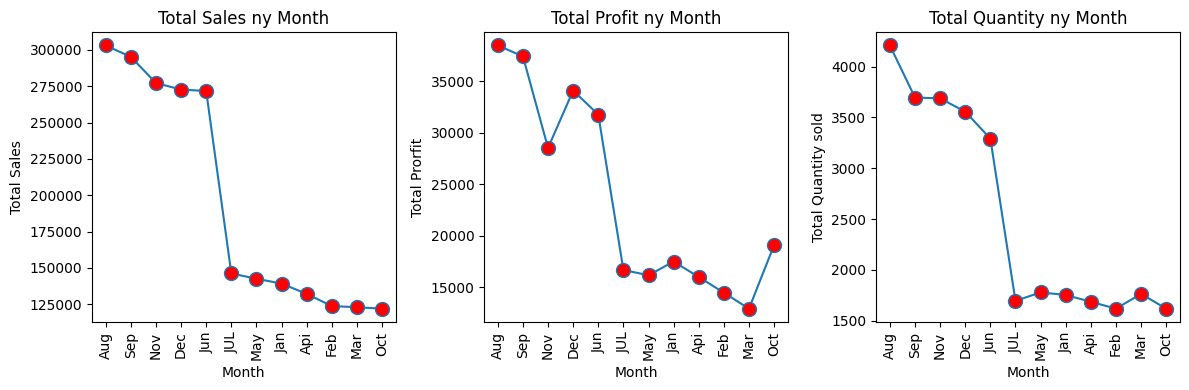

In [ ]:
plt.figure(figsize=(12,4)) #plotting the barplot for the monthly_data
plt.subplot(1,3,1)
plt.plot(monthly_data['Month'],monthly_data['Sales'],marker='o',markerfacecolor='red',markersize=10)
plt.xticks(rotation=90)
plt.title('Total Sales ny Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1,3,2)
plt.plot(monthly_data['Month'],monthly_data['Profit'],marker='o',markerfacecolor='red',markersize=10)
plt.xticks(rotation=90)
plt.title('Total Profit ny Month')
plt.xlabel('Month')
plt.ylabel('Total Prorfit')

plt.subplot(1,3,3)
plt.plot(monthly_data['Month'],monthly_data['Quantity'],marker='o',markerfacecolor='red',markersize=10)
plt.xticks(rotation=90)
plt.title('Total Quantity ny Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [47]:
qurter_data=df.groupby('Quarters').agg({ #grouping the data by Quarters and aggregating the columns
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum',
}).sort_values(by='Sales',ascending=False).reset_index()

In [48]:
qurter_data.style.background_gradient(cmap='Reds') #styling the data

,Quarters,Sales,Profit,Quantity
0,Quarter 3,744537,92593,9597
1,Quarter 4,671851,81746,8861
2,Quarter 2,546256,63944,6755
3,Quarter 1,385717,44919,5135


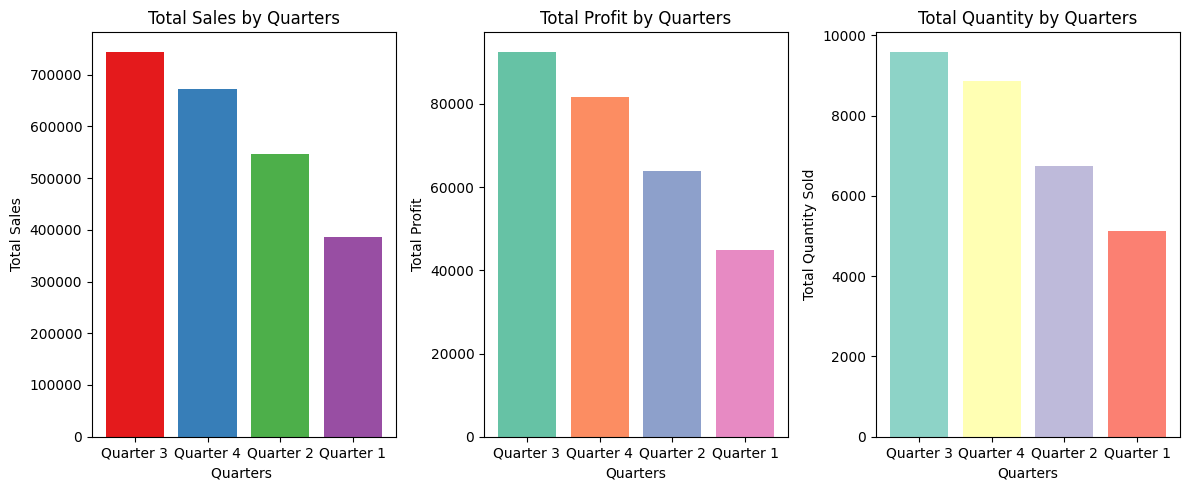

In [ ]:
plt.figure(figsize=(12,5))  #plotting the barplot for the qurter_data

plt.subplot(1, 3, 1)
plt.bar(qurter_data['Quarters'], qurter_data['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Quarters')
plt.xlabel('Quarters ')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(qurter_data['Quarters'], qurter_data['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(qurter_data['Quarters'], qurter_data['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [50]:
Ship_Mode_analysis = df.groupby('Ship Mode').agg({ #grouping the data by Ship Mode and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [51]:
Ship_Mode_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG') #styling the data

,Ship Mode,Sales,Profit,Quantity
0,Economy,1412656,178658,18384
1,Economy Plus,483965,54336,6000
3,Priority,320426,32639,4405
2,Immediate,131314,17569,1559


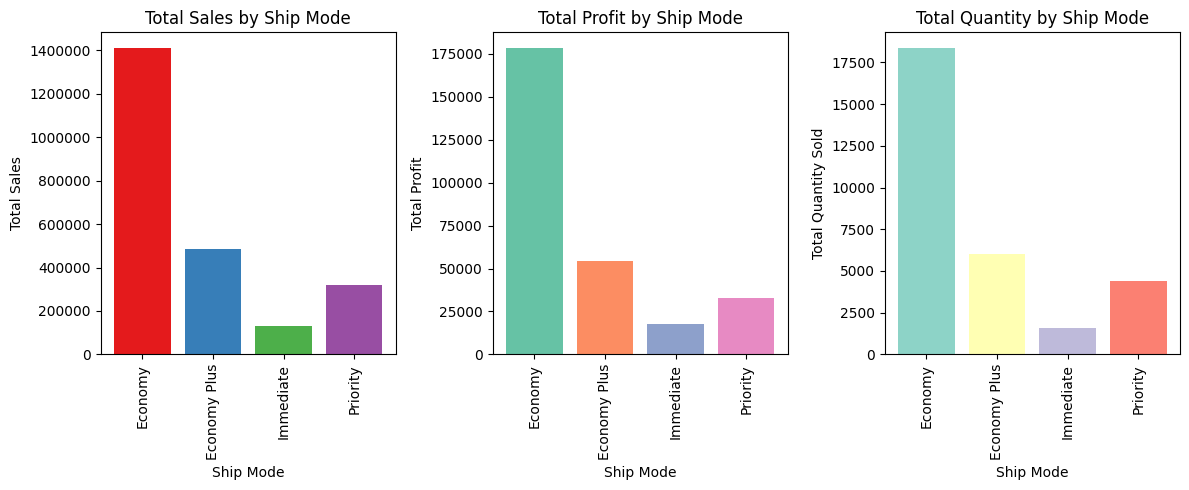

In [ ]:
plt.figure(figsize=(12, 5)) #plotting the barplot for the Ship_Mode_analysis

plt.subplot(1, 3, 1)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Sales'], color=sns.color_palette('Set1'))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()


In [53]:
Segment_analysis = df.groupby('Segment').agg({ #grouping the data by Segment and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [54]:
Segment_analysis.sort_values(by='Sales',ascending=False).style.background_gradient(cmap='BrBG') #styling the data

,Segment,Sales,Profit,Quantity
0,Consumer,1236245,147437,15713
1,Corporate,738137,92634,9498
2,Home Office,373979,43131,5137


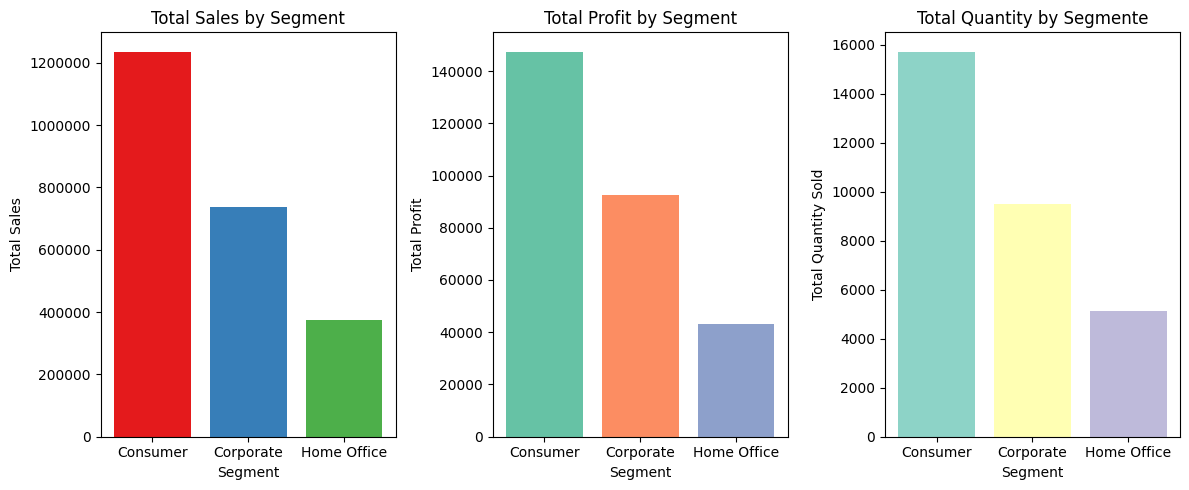

In [ ]:
plt.figure(figsize=(12, 5)) #plotting the barplot for the Segment_analysis

plt.subplot(1, 3, 1)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Sales'], color=sns.color_palette('Set1'))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Segmente')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [56]:
City_analysis = df.groupby('City').agg({ #grouping the data by City and aggregating the columns
    'Sales': 'sum', 
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [57]:
City_analysis.head(10) #checking the top 10 rows

,City,Sales,Profit,Quantity
0,London,69230,13931,820
1,Berlin,52555,5942,690
2,Vienna,51844,13207,714
3,Madrid,44897,11101,577
4,Paris,42245,6680,496
5,Rome,28330,191,409
6,Barcelona,27405,2246,231
7,Hamburg,23574,5858,385
8,Marseille,21677,2889,283
9,Turin,19829,1937,236


In [58]:
City_analysis.tail(10) #checking the bottom 10 rows

,City,Sales,Profit,Quantity
989,Cestas,23,6,2
990,Ragusa,22,7,3
991,Battipaglia,22,-20,1
992,Millau,21,5,2
993,Leiden,19,-15,3
994,Friedberg,18,6,3
995,SÃ¨te,14,7,3
996,Sorgues,14,3,2
997,Aix-les-Bains,10,4,1
998,Osny,5,2,1


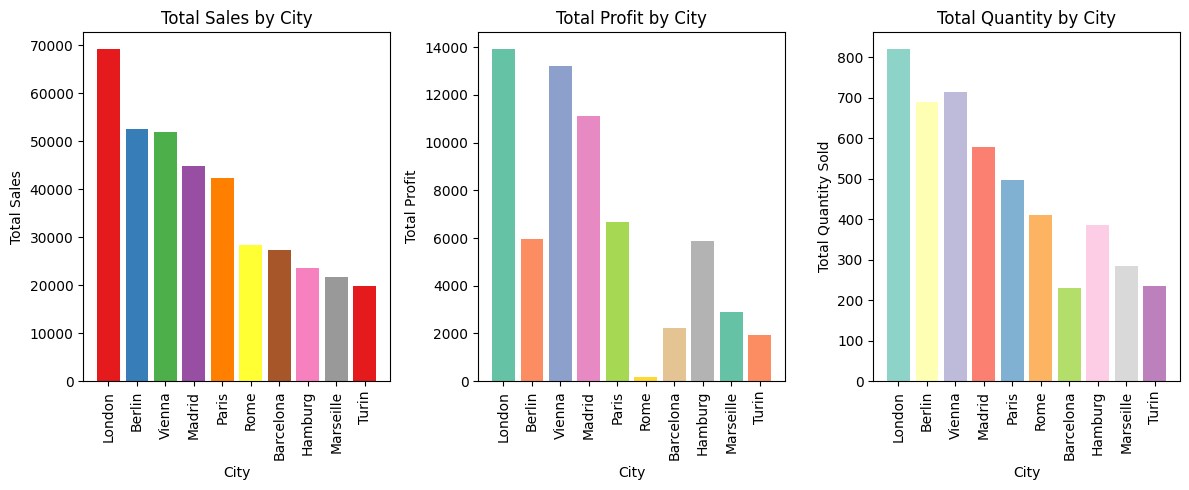

In [ ]:
City_analysis = City_analysis.head(10) #selecting the top 10 rows

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(City_analysis['City'], City_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(City_analysis['City'], City_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(City_analysis['City'], City_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by City')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [60]:
State_analysis = df.groupby('State').agg({ #grouping the data by State and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [61]:
State_analysis.head(10)  #checking the top 10 rows

,State,Sales,Profit,Quantity
0,England,378984,79069,4437
1,Ile-de-France,230138,29457,2644
2,North Rhine-Westphalia,170233,32572,2083
3,Provence-Alpes-CÃ´te d'Azur,81524,11615,940
4,Madrid,57123,13245,749
5,Auvergne-RhÃ´ne-Alpes,55572,9283,658
6,Berlin,52555,5942,690
7,Nord-Pas-de-Calais-Picardie,52007,5207,547
8,Vienna,51844,13207,714
9,Bavaria,49103,9490,540


In [62]:
State_analysis.tail(10) #checking the bottom 10 rows

,State,Sales,Profit,Quantity
117,Zealand,243,-245,15
118,Galway,239,-162,5
119,Kymenlaakso,234,10,6
120,Extremadura,229,-20,2
121,Zeeland,208,-100,9
122,SetÃºbal,182,-11,3
123,Melilla,145,33,6
124,Basilicata,86,-82,4
125,St. Gallen,62,18,5
126,Central Jutland,34,-29,3


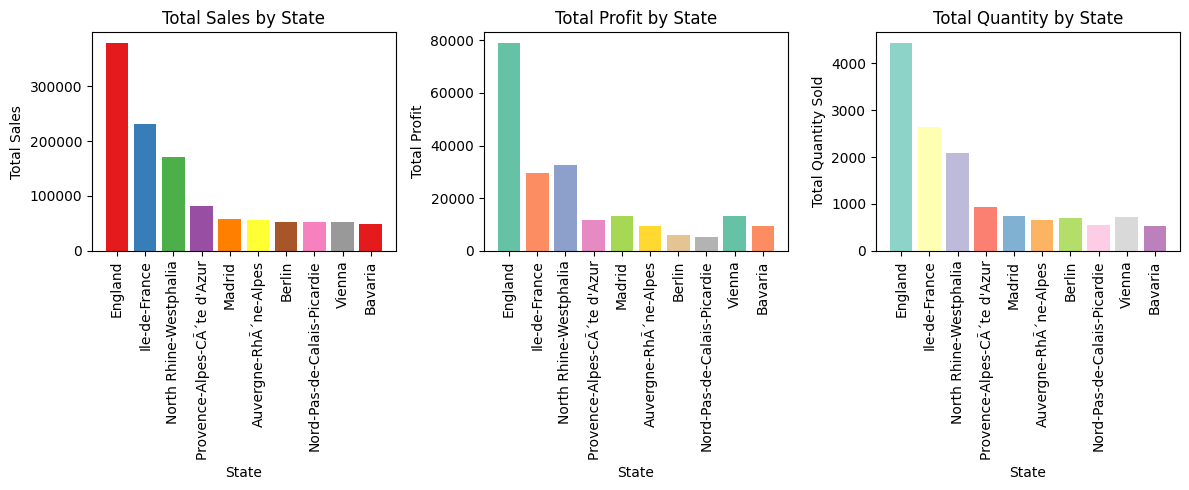

In [ ]:
State_analysis = State_analysis.head(10) #selecting the top 10 rows

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(State_analysis['State'], State_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(State_analysis['State'], State_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(State_analysis['State'], State_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by State')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [64]:
Country_analysis = df.groupby('Country').agg({ #grouping the data by Country and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [65]:
Country_analysis.head(10) #checking the top 10 rows

,Country,Sales,Profit,Quantity
0,France,609683,70067,7329
1,Germany,488681,86279,6179
2,United Kingdom,420497,90382,4917
3,Italy,252742,15802,3612
4,Spain,249318,47039,2878
5,Austria,79382,21332,973
6,Netherlands,70313,-37188,1526
7,Belgium,42283,9902,529
8,Sweden,30490,-17524,753
9,Switzerland,24874,7234,308


In [66]:
Country_analysis.tail(5) #checking the bottom 5 rows

,Country,Sales,Profit,Quantity
10,Finland,20702,3908,201
11,Norway,20529,5167,261
12,Ireland,15998,-6886,392
13,Portugal,15106,-8704,286
14,Denmark,7763,-3608,204


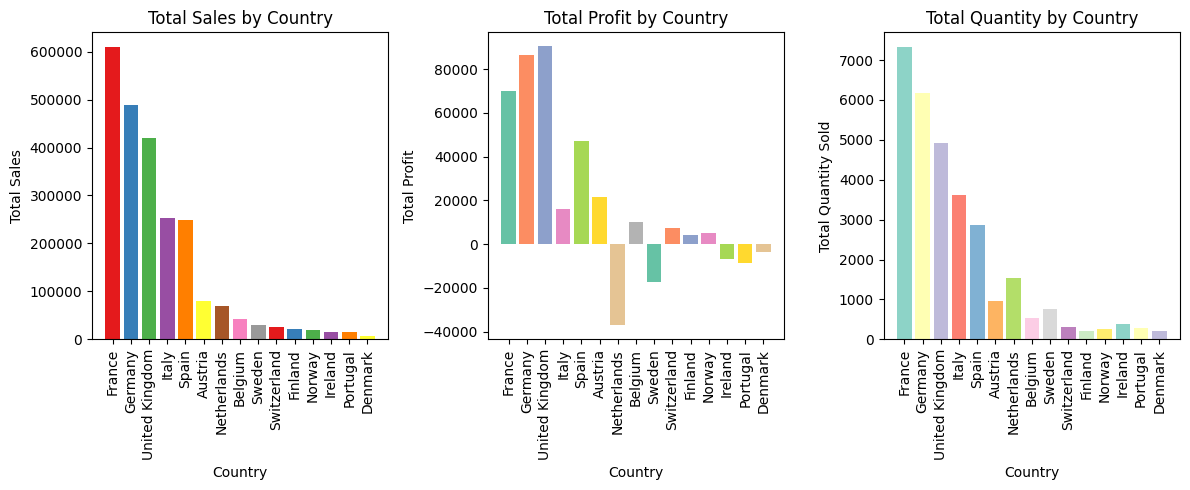

In [ ]:
plt.figure(figsize=(12, 5)) #plotting the barplot for the Country_analysis

plt.subplot(1, 3, 1)
plt.bar(Country_analysis['Country'], Country_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(Country_analysis['Country'], Country_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(Country_analysis['Country'], Country_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [68]:
region_analysis = df.groupby('Region').agg({ #grouping the data by Region and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [69]:
region_analysis.style.background_gradient(cmap='Greens') #styling the data

,Region,Sales,Profit,Quantity
0,Central,1315216,157626,16844
1,North,515979,71439,6728
2,South,517166,54137,6776


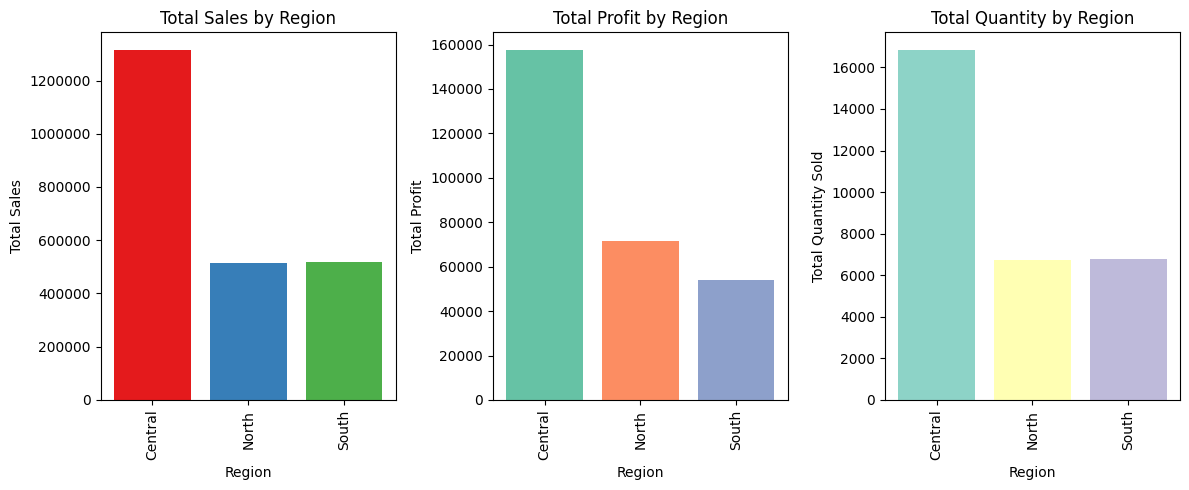

In [ ]:
plt.figure(figsize=(12, 5)) #plotting the barplot for the region_analysis

plt.subplot(1, 3, 1)
plt.bar(region_analysis['Region'], region_analysis['Sales'], color=sns.color_palette('Set1'))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(region_analysis['Region'], region_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(region_analysis['Region'], region_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [71]:
Category_analysis = df.groupby('Category').agg({ #grouping the data by Category and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [ ]:
Category_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG') #styling the data

,Category,Sales,Profit,Quantity
2,Technology,886015,108554,5811
1,Office Supplies,823537,124914,19896
0,Furniture,638809,49734,4641


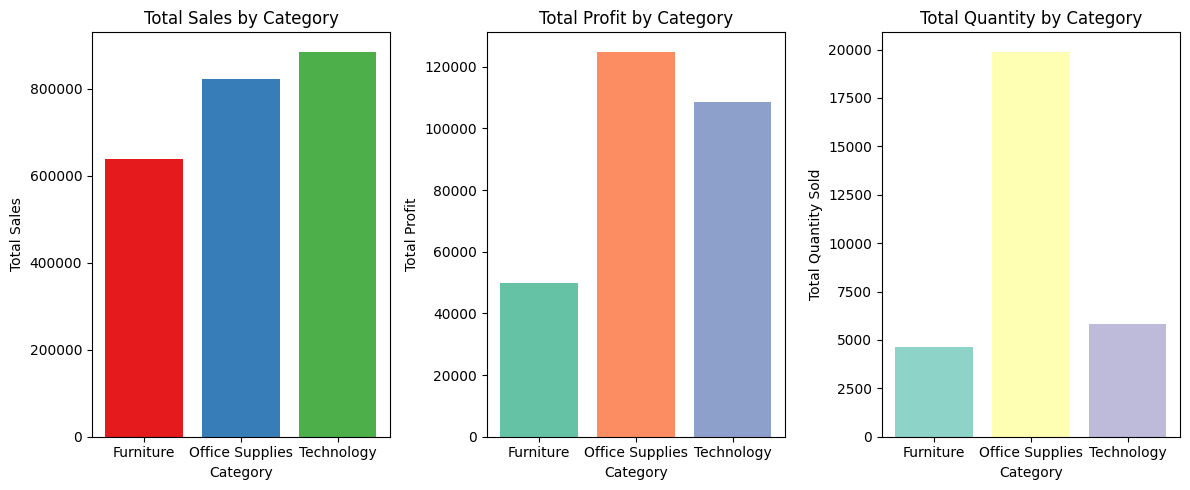

In [ ]:
plt.figure(figsize=(12, 5))     #plotting the barplot for the Category_analysis

plt.subplot(1, 3, 1)
plt.bar(Category_analysis['Category'], Category_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
plt.bar(Category_analysis['Category'], Category_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')

plt.subplot(1, 3, 3)
plt.bar(Category_analysis['Category'], Category_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')

plt.tight_layout() #adjusting the layout
plt.show()

In [74]:
Sub_Category_analysis = df.groupby('Sub-Category').agg({ #grouping the data by Sub-Category and aggregating the columns
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [75]:
Sub_Category_analysis.style.background_gradient(cmap='BrBG') #styling the data

,Sub-Category,Sales,Profit,Quantity
0,Bookcases,294396,43655,1426
1,Copiers,290081,42775,1367
2,Phones,282559,27631,1743
3,Storage,272489,21995,3887
4,Appliances,209900,37906,888
5,Chairs,186698,15489,1459
6,Machines,182066,11318,1249
7,Accessories,131309,26830,1452
8,Art,127147,23481,4326
9,Tables,89478,-20731,287


In [76]:
Sub_Category_analysis.query('Quantity == Quantity.max()') #checking the Sub-Category with maximum Quantity

,Sub-Category,Sales,Profit,Quantity
8,Art,127147,23481,4326


In [77]:
discount_analysis = df.groupby('Discount %').agg({ #grouping the data by Discount % and aggregating the columns
    'Sales': 'mean',
    'Profit': 'mean',
}).sort_values(by='Sales', ascending=False).reset_index()

In [78]:
discount_analysis   #checking the discount_analysis 

,Discount %,Sales,Profit
0,45,"1,273.50",-552.00
1,35,"1,270.11",-225.14
2,15,668.52,58.01
3,70,609.67,-916.17
4,85,555.00,"-1,925.00"
5,10,435.48,72.68
6,65,389.86,-375.71
7,20,334.93,15.50
8,40,261.17,-78.64
9,0,251.22,63.81


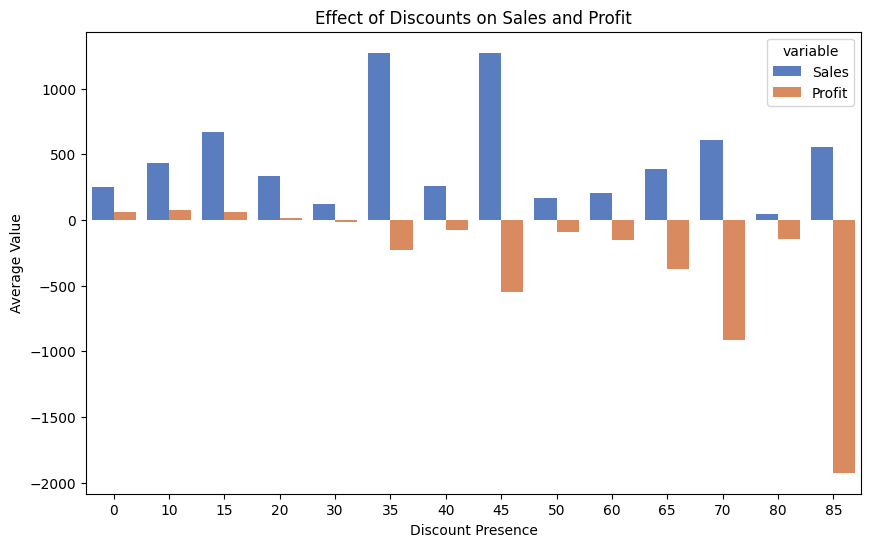

In [ ]:
discount_analysis = df.groupby('Discount %').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index() #grouping the data by Discount % and aggregating the columns

plt.figure(figsize=(10, 6)) #plotting the barplot for the discount_analysis
sns.barplot(x='Discount %', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Discount %'), palette='muted')

plt.xlabel('Discount Presence')
plt.ylabel('Average Value')
plt.title('Effect of Discounts on Sales and Profit')

plt.show()

In [80]:
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10).to_frame().reset_index() #checking the top 10 products

,Product Name,Quantity
0,"Rogers File Cart, Single Width",108
1,"Eldon File Cart, Single Width",104
2,"Binney & Smith Sketch Pad, Blue",90
3,"Stanley Pencil Sharpener, Water Color",89
4,"Avery Index Tab, Clear",81
5,"Boston Pencil Sharpener, Water Color",80
6,"Tenex File Cart, Single Width",78
7,"Sanford Markers, Water Color",75
8,"Boston Canvas, Fluorescent",73
9,"Ibico Index Tab, Clear",72


In [81]:
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).tail(10).to_frame().reset_index() #checking the bottom 10 products

,Product Name,Quantity
0,"Breville Blender, Black",1
1,"Ames Interoffice Envelope, Set of 50",1
2,"Avery Shipping Labels, Alphabetical",1
3,"Chromcraft Coffee Table, Rectangular",1
4,"Sauder Stackable Bookrack, Mobile",1
5,"Cuisinart Microwave, Black",1
6,"Jiffy Manila Envelope, Recycled",1
7,"Belkin Mouse, Programmable",1
8,"Belkin Mouse, Bluetooth",1
9,"Avery Shipping Labels, Laser Printer Compatible",1


In [82]:
feedback_counts = df.groupby(['Product Name', 'Category']).agg({'Feedback?': 'count'}).reset_index() #grouping the data by Product Name and Category and aggregating the columns

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback?', ascending=False) #sorting the feedback_counts

print("Products or categories with the most feedback:")
print(feedback_counts_sorted.head(10))

Products or categories with the most feedback:
                               Product Name         Category  Feedback?
582           Eldon File Cart, Single Width  Office Supplies         26
1367         Rogers File Cart, Single Width  Office Supplies         23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies         22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies         22
1732          Tenex File Cart, Single Width  Office Supplies         21
183                  Avery Index Tab, Clear  Office Supplies         21
311    Boston Pencil Sharpener, Water Color  Office Supplies         20
293         Binney & Smith Sketch Pad, Blue  Office Supplies         19
1379            Rogers Shelving, Wire Frame  Office Supplies         18
993                  Ibico Index Tab, Clear  Office Supplies         18


In [83]:
df.groupby(['Feedback?', 'Product Name'])['Quantity'].count().sort_values(ascending=False).head(10) #checking the top 10 products with feedback

Feedback?  Product Name                          
True       Eldon File Cart, Single Width             14
False      Avery Index Tab, Clear                    14
           Rogers File Cart, Single Width            14
True       Nokia Smart Phone, Full Size              13
           Sanford Pencil Sharpener, Water Color     13
False      Stanley Pencil Sharpener, Water Color     12
True       Tenex File Cart, Single Width             12
False      Eldon File Cart, Single Width             12
True       Binney & Smith Sketch Pad, Blue           11
False      Binney & Smith Sketch Pad, Water Color    11
Name: Quantity, dtype: int64

In [84]:
true_feedback = df[df['Feedback?'] == 'True'] #filtering the data with Feedback? as True
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head() #checking the top 5 products with True feedback

Product Name
Eldon File Cart, Single Width            14
Nokia Smart Phone, Full Size             13
Sanford Pencil Sharpener, Water Color    13
Tenex File Cart, Single Width            12
Ibico Index Tab, Clear                   11
Name: Feedback?, dtype: int64

In [85]:
true_feedback = df[df['Feedback?'] == 'False'] #filtering the data with Feedback? as False
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head() #checking the top 5 products with False feedback

Product Name
Avery Index Tab, Clear                    14
Rogers File Cart, Single Width            14
Stanley Pencil Sharpener, Water Color     12
Eldon File Cart, Single Width             12
Binney & Smith Sketch Pad, Water Color    11
Name: Feedback?, dtype: int64